✍ В двух предыдущих юнитах мы познакомились с основными внутренними и внешними мерами, с помощью которых можно оценивать качество кластеризации. В этом юните мы попрактикуемся в решении задач кластеризации и используем полученные знания, чтобы оценить результаты.

Мы будем использовать данные, взятые с датчиков акселерометров и гироскопов смартфонов Samsung Galaxy S3. Телефоны носили в кармане добровольцы в возрасте от 19 до 49 лет. Смартфоны постоянно фиксировали значения ускорения и скорости по трём измерениям, а поведение людей записывали на видео, чтобы вручную отметить, какую физическую активность осуществлял человек в тот или иной момент.
img
Источник изображения

Данные содержат следующие признаки:

        различные показатели с акселерометра и гироскопа;
        метка активности (физическая активность человека в конкретный момент).

Попробуем на основе данных с гироскопа и акселерометра разделить активности людей на некоторые схожие по своим характеристикам группы. В идеале наблюдения во время ходьбы должны попасть в один кластер, наблюдения во время подъёма по лестнице — в другой и т. д.

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.cluster import AgglomerativeClustering


Задание 4.1

Так как изначально данные были представлены для решения задачи классификации, то они находятся в разных файлах (обучающая и тестовая выборки в соотношении 70/30). Соедините признаки так, чтобы сначала шла обучающая выборка, а затем — тестовая, и отдельно соедините значения целевых переменных (разумеется, в том же порядке).

Какая размерность получилась у набора данных с признаками?

Количество объектов:

In [83]:
X_train = np.loadtxt("data/train.txt")
y_train = np.loadtxt("data/train_labels.txt")
X_test = np.loadtxt("data/test.txt")
y_test = np.loadtxt("data/test_labels.txt")

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

X.shape

(10299, 561)

Задание 4.2

Теперь найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения.

In [84]:
len(np.unique(y))

6

Задание 4.3


Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта, предварительно округлив его до двух знаков после точки-разделителя.

In [85]:
scaler = StandardScaler()

X_norm = scaler.fit_transform(X)
round(X_norm[0][0], 2)

0.21

Задание 4.4


Пора переходить к кластеризации. Для начала определите оптимальное количество кластеров, используя внутренние меры кластеризации. Используйте все известные вам коэффициенты, реализуемые в библиотеке sklearn: коэффициент силуэта, индекс Калински — Харабаса и индекс Дэвиса — Болдина. В качестве алгоритма возьмите k-means++, в качестве значения параметра random_state — число 42.

Выведите оптимальное количество кластеров для каждой метрики, перебирая значения от 2 до 9 включительно. Также введите значение каждой метрики, округлённое до двух знаков после точки-разделителя.

Best Silhouette score: 0.39
Best Calinski-Harabasz score: 7880.81
Best Davies-Bouldin score: 1.07


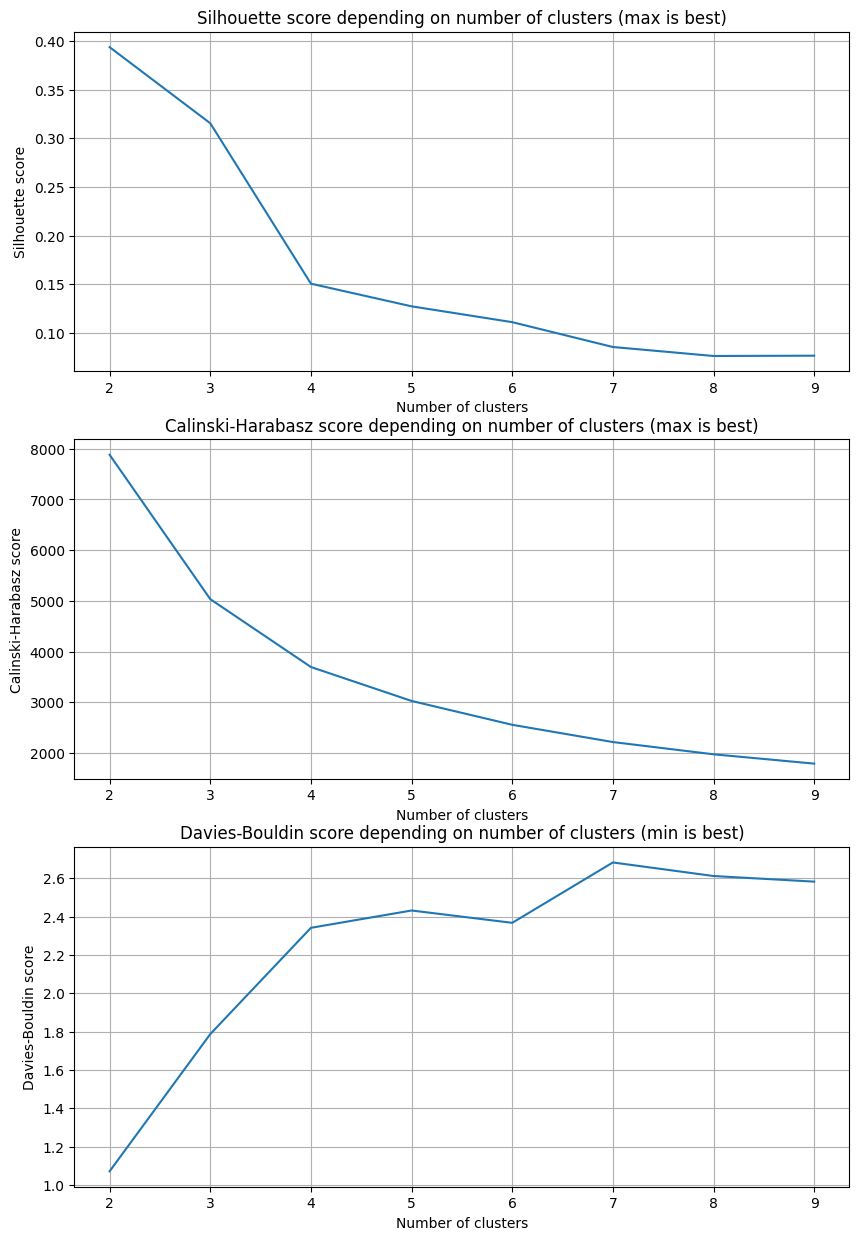

In [86]:
n_clusters = range(2, 10)

def get_scores(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_)
    calinski_harabasz = calinski_harabasz_score(X, k_means.labels_)
    davies_bouldin = davies_bouldin_score(X, k_means.labels_)
    return silhouette, calinski_harabasz, davies_bouldin

silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for cluster in n_clusters:
    silhouette, calinski_harabasz, davies_bouldin = get_scores(cluster, X_norm)
    silhouette_scores.append(silhouette)
    calinski_harabasz_scores.append(calinski_harabasz)
    davies_bouldin_scores.append(davies_bouldin)

print(f'Best Silhouette score: {round(max(silhouette_scores), 2)}')
print(f'Best Calinski-Harabasz score: {round(max(calinski_harabasz_scores), 2)}')
print(f'Best Davies-Bouldin score: {round(min(davies_bouldin_scores), 2)}')
    
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].plot(n_clusters, silhouette_scores)
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('Silhouette score')
axs[0].grid(True)
axs[0].set_title('Silhouette score depending on number of clusters (max is best)')
axs[1].plot(n_clusters, calinski_harabasz_scores)
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Calinski-Harabasz score')
axs[1].grid(True)
axs[1].set_title('Calinski-Harabasz score depending on number of clusters (max is best)')
axs[2].plot(n_clusters, davies_bouldin_scores)
axs[2].set_xlabel('Number of clusters')
axs[2].set_ylabel('Davies-Bouldin score')
axs[2].grid(True)
axs[2].set_title('Davies-Bouldin score depending on number of clusters (min is best)');


Задание 4.5

Теперь давайте оценим качество кластеризации с точки зрения внешних мер. Реализуйте кластеризацию с помощью классической версии алгоритма k-means. Пусть количество кластеров будет соответствовать количеству активностей. Параметр random_state = 42. В качестве ответов введите значения получившихся мер, предварительно округлив их до двух знаков после точки-разделителя.

In [87]:
km = KMeans(n_clusters=6, random_state=42)
y_pred = km.fit_predict(X_norm)
print(f'Homogeneity score: {round(homogeneity_score(y, y_pred), 2)}')
print(f'Completeness score: {round(completeness_score(y, y_pred), 2)}')
print(f'Adjusted Rand score score: {round(adjusted_rand_score(y, y_pred), 2)}')

Homogeneity score: 0.54
Completeness score: 0.58
Adjusted Rand score score: 0.42


Задание 4.6


Выясните, к каким кластерам были преимущественно отнесены различные активности (т. е. в какой кластер попало большинство наблюдений с этой активностью). Нумерацию кластеров начинайте с 1.

Заметьте, что кластеры могут повторяться.



Как видите, есть ряд активностей, обозначенных цифрами. Эти метки означают следующее:

        1 — ходьба;
        2 — подъём;
        3 — спуск;
        4 — сидение;
        5 — стояние;
        6 — лежание.



In [88]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y, km.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))
ct

,1,2,3,4,5,6
ходьба,0,903,0,742,77,0
подъём,2,1242,0,295,5,0
спуск,0,321,0,889,196,0
сидение,451,1,91,0,0,1234
стояние,566,0,0,0,0,1340
лежание,330,5,1556,0,0,53


Задание 4.7

Теперь попробуйте реализовать алгоритм k-means для двух кластеров (для того числа активностей, которое является оптимальным с точки зрения внутренних мер) и снова посмотреть, как алгоритм разобьёт активности по кластерам. Как и в предыдущем задании, нумерацию кластеров начинайте с 1.

In [90]:
km2 = KMeans(n_clusters=2, random_state=42)
km2.fit(X_norm)

#создаём таблицу сопряжённости
ct2 = pd.crosstab(y, km2.labels_)
#определяем название активностей
ct2.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct2.columns = list(range(1,3))
ct2

,1,2
ходьба,1722,0
подъём,1536,8
спуск,1406,0
сидение,3,1774
стояние,0,1906
лежание,12,1932


Задание 4.8

Вычислите значение полноты для разбиения на два кластера алгоритмом k-means. Ответ округлите до двух знаков после точки-разделителя.

In [91]:
print(f'Completeness score: {round(completeness_score(y, km2.labels_), 2)}')

Completeness score: 0.98


Задание 4.10

Давайте сравним полученный результат с агломеративной иерархической кластеризацией. Реализуйте её также для двух кластеров и вычислите значение полноты.

1. Какой алгоритм показывает наилучшее качество, если судить по полноте?
2. Какое значение полноты получилось для агломеративной кластеризации?

In [95]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(X_norm)

print(f'Completeness score: {round(completeness_score(y, ac.labels_), 2)}')

Completeness score: 1.0
